In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
data = pd.read_csv('data/russia_201901_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# I am making 2 toy subset Data Frames and 2 subsets Pandas Series 

### Retweets
retweets_mask = data['is_retweet'] == True
retweets = data[retweets_mask]
toy_retweets_text = retweets['tweet_text'][:100 ]
toy_retweets_df = retweets[:100]


# Tweets
tweets_mask = data['is_retweet'] == False
tweets = data[tweets_mask]
toy_tweets_df = tweets[:100]
toy_tweets_text = tweets['tweet_text'][:100]


#English Only
tweets_english = tweets[ tweets['account_language'] == 'en']
retweets_english = retweets[ retweets['account_language'] == 'en']

In [5]:
tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time',
       'tweet_client_name', 'in_reply_to_tweetid', 'in_reply_to_userid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid',
       'retweet_tweetid', 'latitude', 'longitude', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices'],
      dtype='object')

In [6]:
loc_df = tweets[['userid','user_reported_location']]

In [7]:
loc_df.groupby('user_reported_location').count()['userid']

user_reported_location
Austria                               4
Cleveland                             1
Earth                              4315
France                             2236
Istanbul via Liverpool                7
Jersey City, NJ                     404
Lithuania                            15
Lyon, France                         95
Miami, FL                           216
NY                                   29
New Jersey, USA                      41
New York                           1175
New York, NY                        396
New York, USA                     23823
Newcastle                           389
Paris, France                      2341
Russia, Kaliningrad                2680
Sankt-Petersburg                    628
St. Petersburg, Russia.              50
Stockholm                            18
Syria                              5296
Tampa, FL                            41
US                                    1
USA                                8564
USA  #IslamIsTheP

In [8]:
def clean_user_reportd_location(df):
    '''
    Takes csv_file, reads file into dandas df and cleans user_reported locations. Generalizes country-wide into 
    5 categories: 
    '''
    # read in df file
#     df = pd.read_csv('data')
    # US
    df['user_reported_location'] = df['user_reported_location'].replace('Wichita, Kansas', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('United States 🌎🇺🇸', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('Cleveland', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('NY', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('US', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('Tampa, FL', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('New York, USA', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('USA  #IslamIsTheProbem #WakeUp', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('United states', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('new york', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('USA', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('Jersey City, NJ', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('New York', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('New York, NY', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('Miami, FL', 'United States')
    df['user_reported_location'] = df['user_reported_location'].replace('New Jersey, USA', 'United States')

    # France
    df['user_reported_location'] = df['user_reported_location'].replace('Paris, France', 'France')
    df['user_reported_location'] = df['user_reported_location'].replace('Lyon, France', 'France')
    
    #Russia
    df['user_reported_location'] = df['user_reported_location'].replace('Russia, Kaliningrad', 'Russia')
    df['user_reported_location'] = df['user_reported_location'].replace('St. Petersburg, Russia.', 'Russia')
    df['user_reported_location'] = df['user_reported_location'].replace('Sankt-Petersburg', 'Russia')

    # World-wide
    df['user_reported_location'] = df['user_reported_location'].replace('Earth', 'Worldwide')
    df['user_reported_location'] = df['user_reported_location'].replace('USA/England/Spain/Itay/Germany', 'Worldwide')
    df['user_reported_location'] = df['user_reported_location'].replace('Earth', 'Worldwide')
    df['user_reported_location'] = df['user_reported_location'].replace('World 🌍 *BFF Of SamTheInfidel', 'Worldwide')
    df['user_reported_location'] = df['user_reported_location'].replace('Earth', 'Worldwide')
    df['user_reported_location'] = df['user_reported_location'].replace('Istanbul via Liverpool', 'Worldwide')
        
    #England
        
    df['user_reported_location'] = df['user_reported_location'].replace('Newcastle', 'England')
    df['user_reported_location'] = df['user_reported_location'].replace('Chester', 'England')
    df['user_reported_location'] = df['user_reported_location'].replace('Lichfield\\t ', 'England')
        
    # Stokholm to Sweden
    df['user_reported_location'] = df['user_reported_location'].replace('Stockholm', 'Sweden')
    # convert nan to Worldwide\n",

    df['user_reported_location'] = df['user_reported_location'].replace('nan', 'Worldwide')

    return df

In [9]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

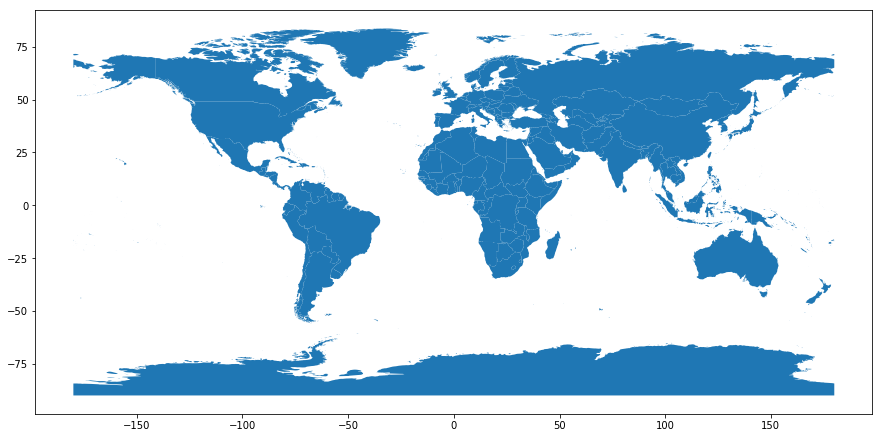

In [10]:
worldmap = gpd.read_file('maps/ne_50m_admin_0_countries.shp')
fig, ax = plt.subplots(figsize = (15, 15))
worldmap .plot(ax = ax)


# https://www.statsilk.com/maps/download-free-shapefile-maps

In [11]:
crs = {'init': 'epsg: 4326'}

In [12]:
loc_df['Latitude'] = 0
loc_df['Longitude'] = 0
# https://www.latlong.net/
#Wichita, Kansas

# LATITUDE
# 37.686020
# LONGITUDE
# -97.335571

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Clean Up down to cities/countries

In [13]:
# US cities

loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Wichita, Kansas', 'Wichita, Kansas, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('NY', 'New York, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Tampa, FL', 'Tampa, FL, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Cleveland', 'Cleveland, OH, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('new york', 'New York, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('New York', 'New York, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('New York, NY', 'New York, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Jersey City, NJ', 'Jersey City, NJ, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Miami, FL', 'Miami, FL, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('New Jersey, USA', 'New Jersey, US')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('New York, USA', 'New York, US')

#Russia
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Russia, Kaliningrad', 'Kaliningrad, Russia')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('St. Petersburg, Russia.', 'St. Petersburg, Russia')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Sankt-Petersburg', 'St. Petersburg, Russia')

#England

loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Newcastle', 'Newcastle, England')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Chester', 'Chester, England')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Lichfield\\t ', 'Lichfield, England')

# Sweden
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Stockholm', 'Stockholm, Sweden')

# France
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Paris, France', 'Paris, France')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Lyon, France', 'Lyon, France')

# World-wide
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Earth', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('USA/England/Spain/Itay/Germany', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Earth', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('World 🌍 *BFF Of SamTheInfidel', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Earth', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('Istanbul via Liverpool', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('USA  #IslamIsTheProbem #WakeUp', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('United states', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('United States', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('United States 🌎🇺🇸', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('US', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('nan', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('USA', 'Worldwide')
loc_df['user_reported_location'] = loc_df['user_reported_location'].replace('USA', 'Worldwide')








/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [14]:
loc_df = loc_df.drop(loc_df[loc_df['user_reported_location'] == 'Worldwide'].index)
loc_df['user_reported_location'].unique()

array(['New York, US', 'Paris, France', nan, 'Kaliningrad, Russia',
       'Jersey City, NJ, US', 'Zimbabwe', 'France', 'Newcastle, England',
       'St. Petersburg, Russia', 'Miami, FL, US', 'Syria',
       'Tampa, FL, US', 'Stockholm, Sweden', 'New Jersey, US',
       'Lyon, France', 'Wichita, Kansas, US', 'Cleveland, OH, US',
       'Lithuania', 'Austria'], dtype=object)

In [15]:
loc_df['Latitude'][loc_df['user_reported_location']=='New York, US'] = 40.712776
loc_df['Longitude'][loc_df['user_reported_location']=='New York, US'] = -74.005974

loc_df['Latitude'][loc_df['user_reported_location']=='Paris, France'] = 48.856613
loc_df['Longitude'][loc_df['user_reported_location']=='Paris, France'] = 2.352222

loc_df['Latitude'][loc_df['user_reported_location']=='Kaliningrad, Russia'] = 54.720379
loc_df['Longitude'][loc_df['user_reported_location']=='Kaliningrad, Russia'] = 20.500891

loc_df['Latitude'][loc_df['user_reported_location']=='Jersey City, NJ, US'] = 40.712776
loc_df['Longitude'][loc_df['user_reported_location']=='Jersey City, NJ, US'] = 40.712776

loc_df['Latitude'][loc_df['user_reported_location']=='Zimbabwe'] = -19.015438
loc_df['Longitude'][loc_df['user_reported_location']=='Zimbabwe'] = 29.154858

loc_df['Latitude'][loc_df['user_reported_location']=='France'] = 46.227638
loc_df['Longitude'][loc_df['user_reported_location']=='France'] = 2.213749

loc_df['Latitude'][loc_df['user_reported_location']=='Newcastle, England'] = 54.978252
loc_df['Longitude'][loc_df['user_reported_location']=='Newcastle, England'] = -1.617780

loc_df['Latitude'][loc_df['user_reported_location']=='St. Petersburg, Russia'] = 59.938480
loc_df['Longitude'][loc_df['user_reported_location']=='St. Petersburg, Russia'] = 30.312481

loc_df['Latitude'][loc_df['user_reported_location']=='Miami, FL, US'] = 25.761681
loc_df['Longitude'][loc_df['user_reported_location']=='Miami, FL, US'] = -80.191788

loc_df['Latitude'][loc_df['user_reported_location']=='Syria'] = 34.802074
loc_df['Longitude'][loc_df['user_reported_location']=='Syria'] = 38.996815

loc_df['Latitude'][loc_df['user_reported_location']=='Tampa, FL, US'] = 27.950575
loc_df['Longitude'][loc_df['user_reported_location']=='Tampa, FL, US'] = -82.457176

loc_df['Latitude'][loc_df['user_reported_location']=='Stockholm, Sweden'] = 59.329323
loc_df['Longitude'][loc_df['user_reported_location']=='Stockholm, Sweden'] = 18.068581

loc_df['Latitude'][loc_df['user_reported_location']=='New Jersey, US'] = 40.058323
loc_df['Longitude'][loc_df['user_reported_location']=='New Jersey, US'] = -74.405663

loc_df['Latitude'][loc_df['user_reported_location']=='Lyon, France'] = 45.764042
loc_df['Longitude'][loc_df['user_reported_location']=='Lyon, France'] = 4.835659

loc_df['Latitude'][loc_df['user_reported_location']=='Wichita, Kansas, US'] = 37.686020
loc_df['Longitude'][loc_df['user_reported_location']=='Wichita, Kansas, US'] = -97.335571

loc_df['Latitude'][loc_df['user_reported_location']=='Cleveland, OH, US'] = 41.499321
loc_df['Longitude'][loc_df['user_reported_location']=='Cleveland, OH, US'] = -81.694359

loc_df['Latitude'][loc_df['user_reported_location']=='Lithuania'] = 55.169437
loc_df['Longitude'][loc_df['user_reported_location']=='Lithuania'] = 23.881275

loc_df['Latitude'][loc_df['user_reported_location']=='Austria'] = 40.712776
loc_df['Longitude'][loc_df['user_reported_location']=='Austria'] = 40.712776
loc_df.head()






/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,userid,user_reported_location,Latitude,Longitude
0,TfAIZXAy2WKyIaMRGRo5Bc7TvYn5jid4HDIhZjHGuL0=,"New York, US",40.712776,-74.005974
1,aX+o4MEU0jsv3nWf6rkY9XdnJo+lUKxMZ3dB4rKPeIg=,"New York, US",40.712776,-74.005974
4311,cSIJxicNyNa8eYE9tRRM8QmQpwcbGH20htSp7SyLUy4=,"New York, US",40.712776,-74.005974
4312,cSIJxicNyNa8eYE9tRRM8QmQpwcbGH20htSp7SyLUy4=,"New York, US",40.712776,-74.005974
5926,UxHMIcBMIHLVpprg7SZpRNYqPcMNVYzU3uEezHQ6MUA=,"Paris, France",48.856613,2.352222


In [16]:
loc_df.dropna(inplace = True)
loc_df.sample(20)

,userid,user_reported_location,Latitude,Longitude
304535,c55kZ6ZRXlASq5mZIW53LnWKjYRIhXE9gm23kkDy0pA=,"New York, US",40.712776,-74.005974
532901,9zeFOFTrAPlPBSFZtfMRsXF0pWWGQ60BaGMPGC2Pvo=,"New York, US",40.712776,-74.005974
122432,MVjj0Aj40XKsVzG+kIkQa7t4BeeazDhZbASEpHKliI=,"St. Petersburg, Russia",59.938480,30.312481
758092,qM22PSOR346G41PNTdiv2u5lneMd1Xquy+CTB1iT5mU=,"New York, US",40.712776,-74.005974
596818,JLnCOmMISTchfTXm8Zw877boLDYIPvkXQzp9wusHa+Q=,"New York, US",40.712776,-74.005974
545712,4125840934,Syria,34.802074,38.996815
166297,nua0FFuxhaRRs4322q7ta4h6pDbvNV5lEYZrGDwnvT0=,France,46.227638,2.213749
545070,vTHdHFFzN+grXpNrBaCqijpTM4G6AfPoPt410s4Tfts=,"St. Petersburg, Russia",59.938480,30.312481
756866,UxHMIcBMIHLVpprg7SZpRNYqPcMNVYzU3uEezHQ6MUA=,"Paris, France",48.856613,2.352222
6342,7I4Q+VADjHBIxBuFJFz1RbsAng9lp7ReASzKKFg5Jb4=,"New York, US",40.712776,-74.005974


In [17]:
loc_df.sample(20)

,userid,user_reported_location,Latitude,Longitude
255710,5pV0hiEhK4LdI9wFDn39o3vq7N3XHS3PcUbpDt9RFs=,"New York, US",40.712776,-74.005974
740154,vTHdHFFzN+grXpNrBaCqijpTM4G6AfPoPt410s4Tfts=,"St. Petersburg, Russia",59.938480,30.312481
582015,zLWRRcLtsGHstD6K06x3q9fdSyVv2dRCSWJQaG5yus=,"Kaliningrad, Russia",54.720379,20.500891
711223,CRLdvJh+9jfGRV54mAieUn0JPPrkoAKkTmzQVxYLSo=,"Newcastle, England",54.978252,-1.617780
545922,4125840934,Syria,34.802074,38.996815
679533,UxHMIcBMIHLVpprg7SZpRNYqPcMNVYzU3uEezHQ6MUA=,"Paris, France",48.856613,2.352222
728819,nua0FFuxhaRRs4322q7ta4h6pDbvNV5lEYZrGDwnvT0=,France,46.227638,2.213749
663283,8S8kJelkwwHngkSYmGGvqXUeyDiGNNY3FoY5ZmMZvfE=,"New York, US",40.712776,-74.005974
576704,zLWRRcLtsGHstD6K06x3q9fdSyVv2dRCSWJQaG5yus=,"Kaliningrad, Russia",54.720379,20.500891
743038,4125840934,Syria,34.802074,38.996815


In [18]:
geometry = [Point(xy) for xy in zip(loc_df['Longitude'], loc_df['Latitude'])]
geometry[:3]

In [19]:
geo_df = gpd.GeoDataFrame(loc_df, crs = crs, geometry = geometry)
geo_df.head()

,userid,user_reported_location,Latitude,Longitude,geometry
0,TfAIZXAy2WKyIaMRGRo5Bc7TvYn5jid4HDIhZjHGuL0=,"New York, US",40.712776,-74.005974,POINT (-74.00597399999999 40.712776)
1,aX+o4MEU0jsv3nWf6rkY9XdnJo+lUKxMZ3dB4rKPeIg=,"New York, US",40.712776,-74.005974,POINT (-74.00597399999999 40.712776)
4311,cSIJxicNyNa8eYE9tRRM8QmQpwcbGH20htSp7SyLUy4=,"New York, US",40.712776,-74.005974,POINT (-74.00597399999999 40.712776)
4312,cSIJxicNyNa8eYE9tRRM8QmQpwcbGH20htSp7SyLUy4=,"New York, US",40.712776,-74.005974,POINT (-74.00597399999999 40.712776)
5926,UxHMIcBMIHLVpprg7SZpRNYqPcMNVYzU3uEezHQ6MUA=,"Paris, France",48.856613,2.352222,POINT (2.352222 48.856613)


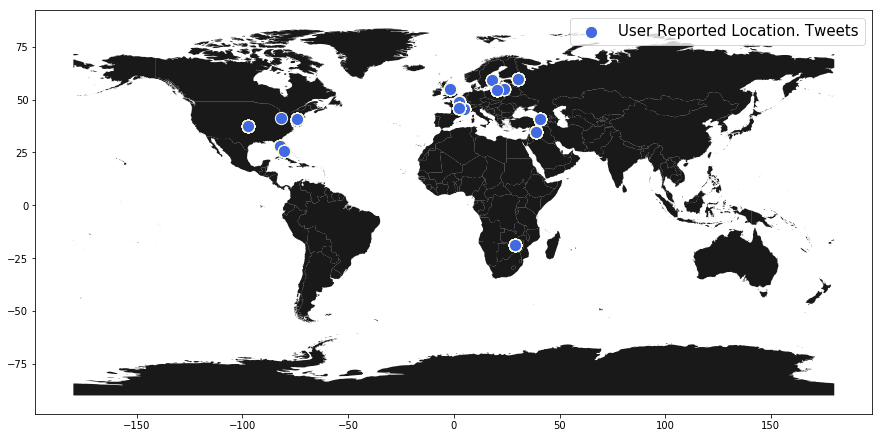

In [20]:
fig, ax = plt.subplots(figsize = (15,15))
worldmap.plot(ax = ax, alpha = 0.9, color = 'black')
geo_df.plot(ax = ax, markersize = 150, color = 'royalblue', marker = 'o', edgecolors = 'lightyellow', label = 'User Reported Location. Tweets' )
plt.legend(prop = {'size': 15})
plt.savefig('plots/tweets_map.png')

NEW YORK

LATITUDE
40.712776
LONGITUDE
-74.005974

FRANCE

LATITUDE
46.227638
LONGITUDE
2.213749

PARIS

LATITUDE
48.856613
LONGITUDE
2.352222

KALININGRAD

LATITUDE
54.720379
LONGITUDE
LONGITUDE

NEW JERSEY
LATITUDE
40.058323
LONGITUDE
-74.405663

ZIMBABWE
LATITUDE
-19.015438
LONGITUDE
29.154858

NEWCASTLE

LATITUDE
54.978252
LONGITUDE
-1.617780


St. Petersburg

LATITUDE
59.938480
LONGITUDE
30.312481

MIAMI

LATITUDE
25.761681
LONGITUDE
-80.191788

Syria

LATITUDE
34.802074
LONGITUDE
38.996815


Tampa Fl

LATITUDE
27.950575
LONGITUDE
-82.457176

Stokholm 

LATITUDE
59.329323
LONGITUDE
18.068581

Lyon, France

LATITUDE
45.764042
LONGITUDE
4.835659

Wichita, Kansas

LATITUDE
37.686020
LONGITUDE
-97.335571

Cleveland

LATITUDE
41.499321
LONGITUDE
-81.694359


Lithuania

LATITUDE
55.169437
LONGITUDE
23.881275



Lichifield
LATITUDE
52.683559
LONGITUDE
-1.822360